In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [5]:
df.shape

(1470, 35)

Dataframe have 1470 rows and 35 columns

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are 8 columns with object type data including the label column, rest all the columns have integer type values.

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataframe

In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

There are three columns with only one unique values.

In [9]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Dataset is imbalanced.

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Every column has count equal to 1470 signifying no missing values. Outliers are also present as the min, max, and interquartile ranges have large difference.

# Univariate Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64

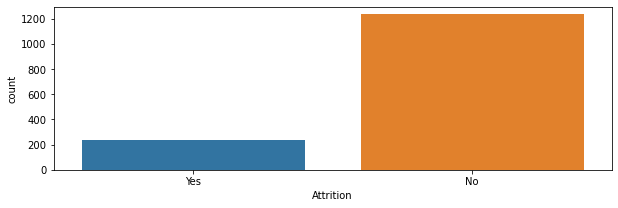

In [11]:
# Attrition
plt.figure(figsize=(10,3))
sn.countplot(df['Attrition'])
df['Attrition'].value_counts()

<AxesSubplot:ylabel='Attrition'>

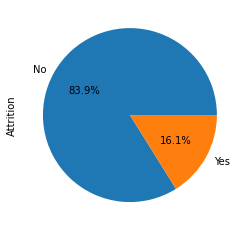

In [12]:
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')

Dataset is highly imbalance as the label class has only 16.1% of yes and 83.9% of no category.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

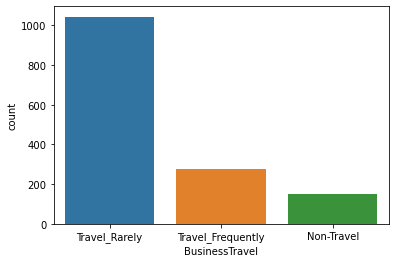

In [13]:
# Business Travel
sn.countplot(df['BusinessTravel'])
df['BusinessTravel'].value_counts()

Majority of the employees travel rarely while 150 of employees are non travellers.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

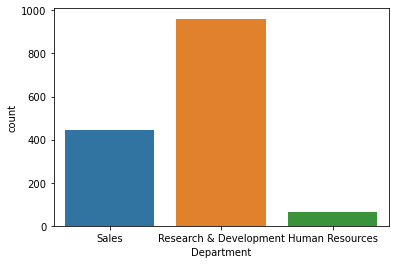

In [14]:
#Department
sn.countplot(df['Department'])
df['Department'].value_counts()

There are three departments in the company. Most of the employees work in Research & Development department while very few work in the HR department.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

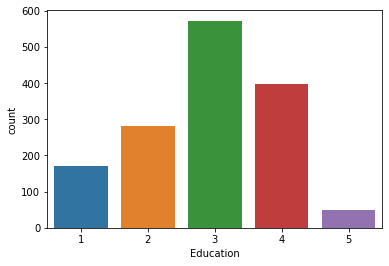

In [15]:
# Education
sn.countplot(df['Education'])
df['Education'].value_counts()

There are 5 categories of Education. Only 48 employee hold the highest education qualification. Most of the employees have the education category 3.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

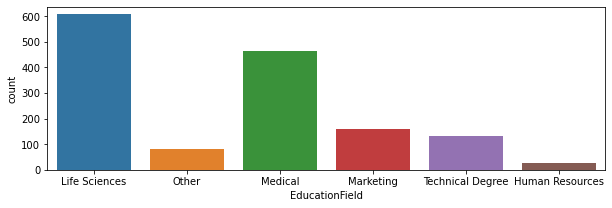

In [16]:
# Education field
plt.figure(figsize=(10,3))
sn.countplot(df['EducationField'])
df['EducationField'].value_counts()

Majority of the employees have Life sciences as there field. There are a lot of employees belonging to medical field as well. Apart from all fields, there is an Other field which may contain employees from rare educational fields.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

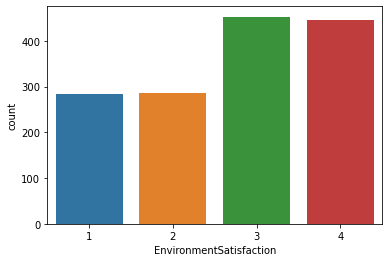

In [17]:
# Environment Satisfaction
sn.countplot(df['EnvironmentSatisfaction'])
df['EnvironmentSatisfaction'].value_counts()

Most of the employees show high levels of environment satisfaction but around 284 employees show very low satisfaction which is quite a big number.

Male      882
Female    588
Name: Gender, dtype: int64

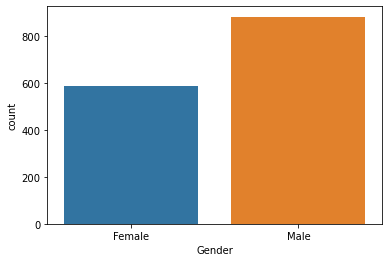

In [18]:
# Gender
sn.countplot(df['Gender'])
df['Gender'].value_counts()

Majority of the employees working are males. There is a 3:2 gender ratio.

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

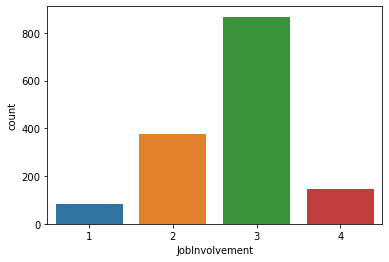

In [19]:
# Job Involvement
sn.countplot(df['JobInvolvement'])
df['JobInvolvement'].value_counts()

Category 3 people show the highest involment in there job, while category 1 shows least involment, may be they are part time workers.

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

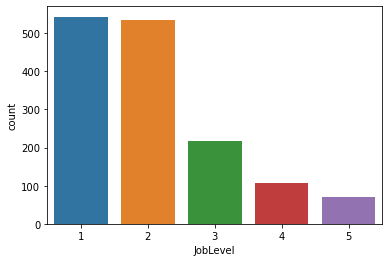

In [20]:
# Joblevel
sn.countplot(df['JobLevel'])
df['JobLevel'].value_counts()

There are 5 job levels. Oviously high positons have less number of employee, Majority of the employees work in lower levels

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

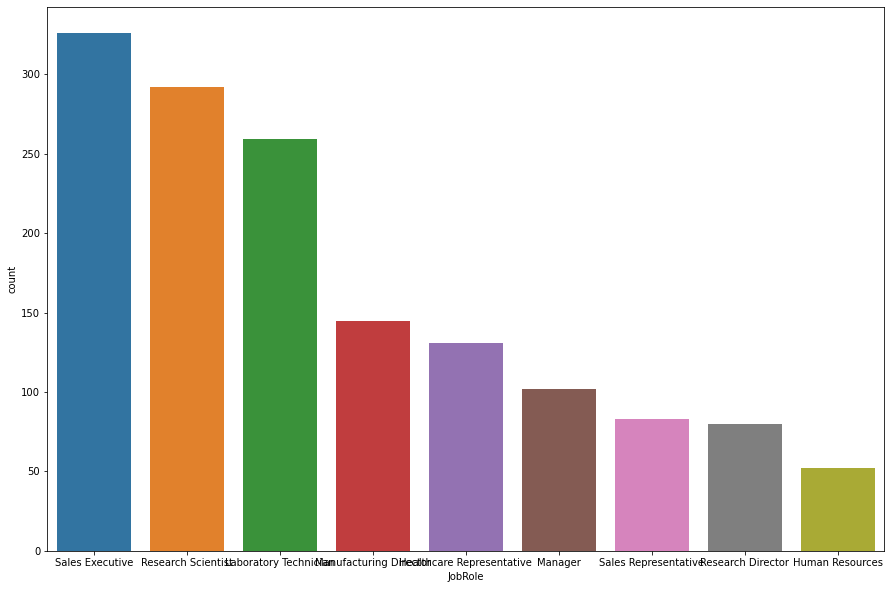

In [21]:
plt.figure(figsize=(15,10))
sn.countplot(df['JobRole'])
df['JobRole'].value_counts()

There are 9 job roles. Most of them are of Sales Executive, and only 52 are of Human Resources.

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

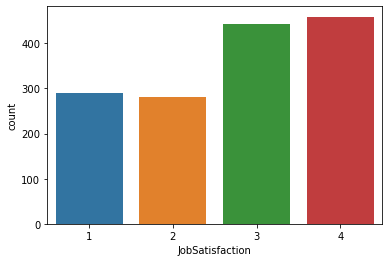

In [22]:
# JobSatisfaction
sn.countplot(df['JobSatisfaction'])
df['JobSatisfaction'].value_counts()

There are 4 levels of job satisfaction. Most of the employees are satified with there job but around 569 people show low to satisfactory opinion on there job satisfaction, which is a large number

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

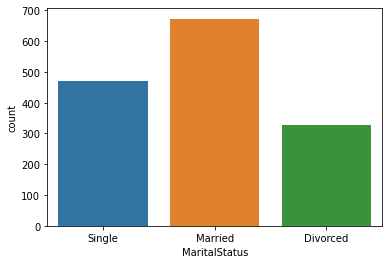

In [23]:
# Marital Status
sn.countplot(df['MaritalStatus'])
df['MaritalStatus'].value_counts()

Most of the employees are Married and a lot of them are divorced. Marital status can also define the age category of an employee as young,middle age and old.

No     1054
Yes     416
Name: OverTime, dtype: int64

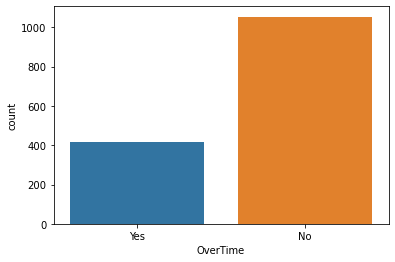

In [24]:
# OverTime
sn.countplot(df['OverTime'])
df['OverTime'].value_counts()

Only 416 people work overtime, maybe they are in need of money or few number of acquaintances.

3    1244
4     226
Name: PerformanceRating, dtype: int64

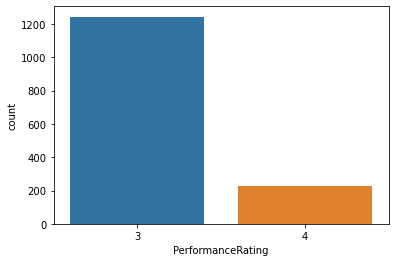

In [25]:
# PerformanceRating
sn.countplot(df['PerformanceRating'])
df['PerformanceRating'].value_counts()

There are only two categories 3 and 4, it could be that none of the employees have performance in level 1 or 2.

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

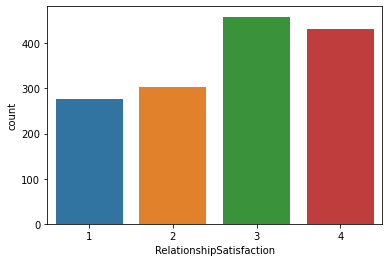

In [26]:
# RelationshipSatisfaction
sn.countplot(df['RelationshipSatisfaction'])
df['RelationshipSatisfaction'].value_counts()

Most of the people are satisfied with there relationship.

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

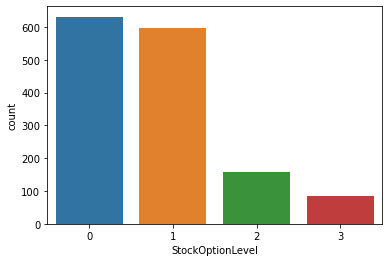

In [27]:
# StockOptionLevel
sn.countplot(df['StockOptionLevel'])
df['StockOptionLevel'].value_counts()

Most of the employees are holding very few stocks while the number of employees with highest stocks are very few.

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

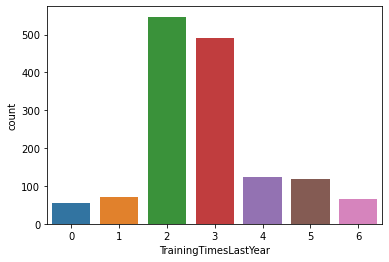

In [28]:
# TrainingTimesLastYear
sn.countplot(df['TrainingTimesLastYear'])
df['TrainingTimesLastYear'].value_counts()

Most of the employees train 2 to 3 times a year while no. of employees training rigorously or doing none of the training are very few in numbers.

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

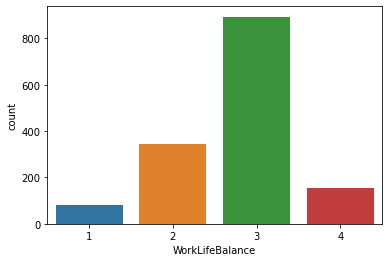

In [29]:
# WorkLifeBalance
sn.countplot(df['WorkLifeBalance'])
df['WorkLifeBalance'].value_counts()

Majority of the employees have there life balance at level 3, there are around 80 employees who need to work on this. Only 153 employees have there life completely balanced.

Maximum 60
Minimum 18


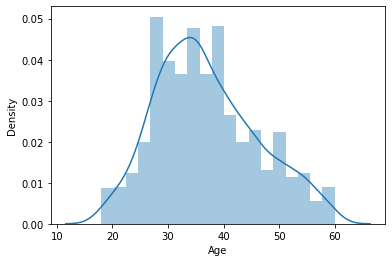

In [30]:
sn.distplot(df["Age"])
print('Maximum',df['Age'].max())
print('Minimum',df['Age'].min())

Data is almost normally distributed. Majority of the employees working have there age in the range 28 to 40. Employees as young as 18 start working in the company and the retirement age seems to be 60.

Maximum 1499
Minimum 102


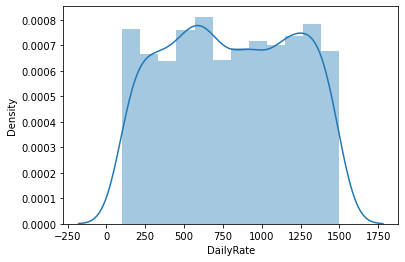

In [31]:
sn.distplot(df['DailyRate'])
print('Maximum',df['DailyRate'].max())
print('Minimum',df['DailyRate'].min())

Distribution of employees is even for Daily Rate.Data is almost normally distributed. Daily rate of employees range from 102 to 1499.

Maximum 100
Minimum 30


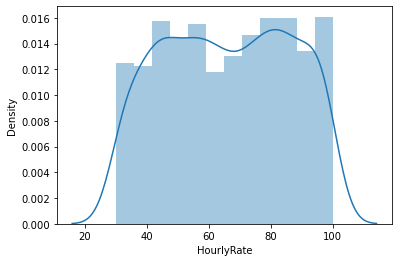

In [32]:
sn.distplot(df['HourlyRate'])
print('Maximum',df['HourlyRate'].max())
print('Minimum',df['HourlyRate'].min())

Distribution of employees is even for hourly rate.Hourly rate of employees ranges from 30 to 100.

Maximum 29
Minimum 1


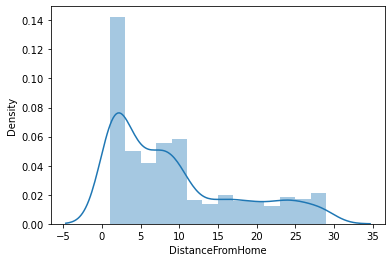

In [33]:
sn.distplot(df['DistanceFromHome'])
print('Maximum',df['DistanceFromHome'].max())
print('Minimum',df['DistanceFromHome'].min())

Most of the employees live less than 3 kms from the office. There are around 100 employees who travel more than 25kms to reach office. 

Maximum 19999
Minimum 1009


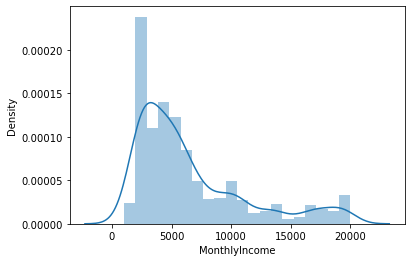

In [34]:
sn.distplot(df['MonthlyIncome'])
print('Maximum',df['MonthlyIncome'].max())
print('Minimum',df['MonthlyIncome'].min())

Employees get income from 1009 to 19999. Majority of the employees get income around 2500. There are less than 50 employees getting income of the highest level.

Maximum 26999
Minimum 2094


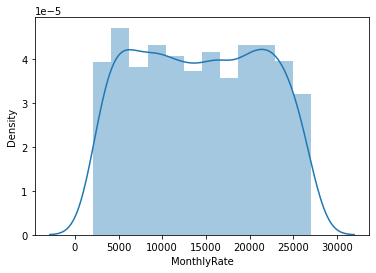

In [35]:
sn.distplot(df['MonthlyRate'])
print('Maximum',df['MonthlyRate'].max())
print('Minimum',df['MonthlyRate'].min())

Monthly rate range from 2094 to 25999 with number of employees showing very less variance.

Maximum 25
Minimum 11


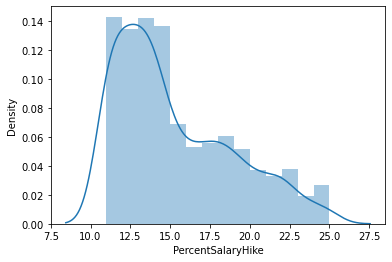

In [36]:
sn.distplot(df['PercentSalaryHike'])
print('Maximum',df['PercentSalaryHike'].max())
print('Minimum',df['PercentSalaryHike'].min())

Most employees are given percent salary hike in the range of 11 to 15 percent while few are also given hike around 24 to 25 percent.

Maximum 40
Minimum 0


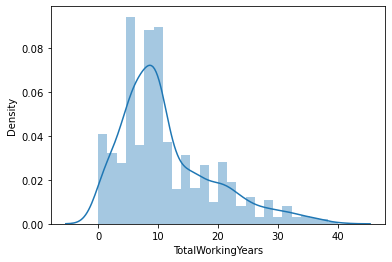

In [37]:
sn.distplot(df['TotalWorkingYears'])
print('Maximum',df['TotalWorkingYears'].max())
print('Minimum',df['TotalWorkingYears'].min())

Employees are working in the company for more than 30 years but the majority of employees working in the company have total years of working in the range 5 to 11 years.

Maximum 40
Minimum 0


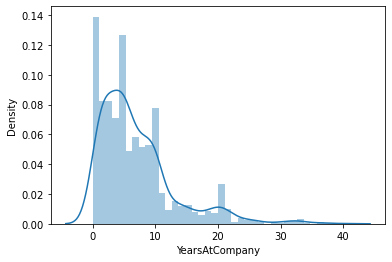

In [38]:
sn.distplot(df['YearsAtCompany'])
print('Maximum',df['YearsAtCompany'].max())
print('Minimum',df['YearsAtCompany'].min())

There very few loyal employees who have been in the company for more than 30 years. Majority of the employees consist of new employees who have been in the company for only an year.

<AxesSubplot:>

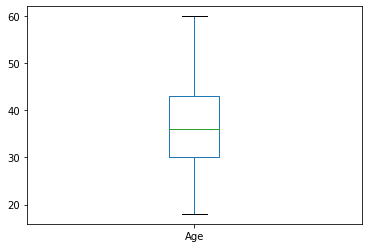

In [39]:
df["Age"].plot.box()

<AxesSubplot:>

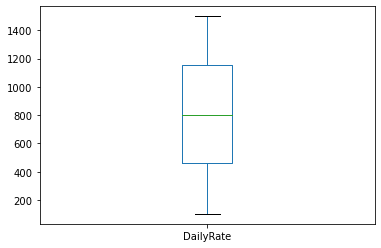

In [40]:
df["DailyRate"].plot.box()

<AxesSubplot:>

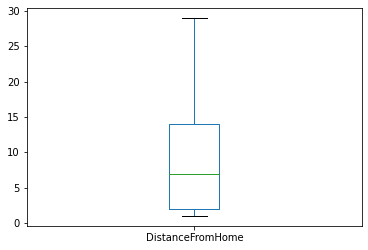

In [41]:
df["DistanceFromHome"].plot.box()

<AxesSubplot:>

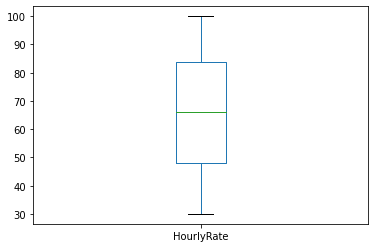

In [42]:
df["HourlyRate"].plot.box()

<AxesSubplot:>

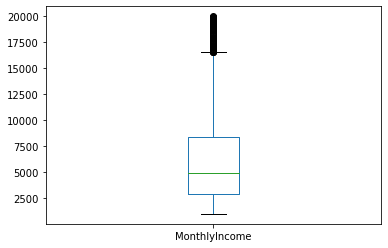

In [43]:
df["MonthlyIncome"].plot.box()

<AxesSubplot:>

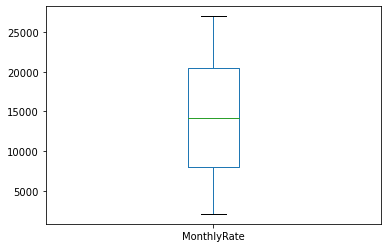

In [44]:
df["MonthlyRate"].plot.box()

<AxesSubplot:>

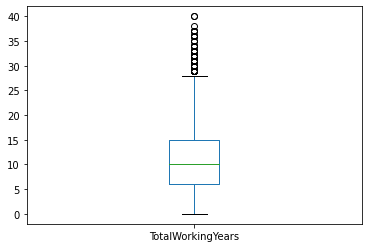

In [45]:
df["TotalWorkingYears"].plot.box()

<AxesSubplot:>

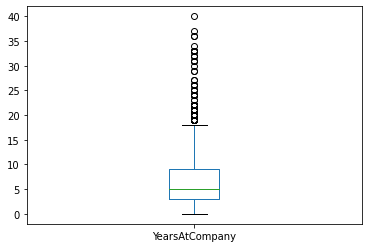

In [46]:
df["YearsAtCompany"].plot.box()

There are few outliers present in the continuous data, while a large number of outliers are present in the Monthly income column.

# Bivariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

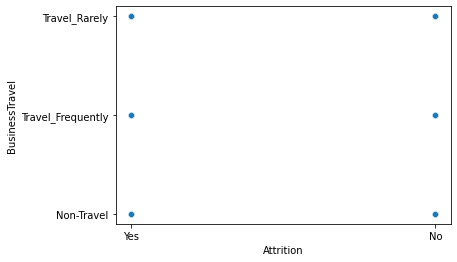

In [47]:
sn.scatterplot(x='Attrition',y='BusinessTravel',data=df)

Employees who do not travel on bussinesses tend to attrit more.

<AxesSubplot:xlabel='Attrition', ylabel='Education'>

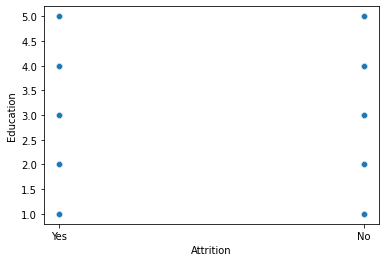

In [48]:
sn.scatterplot(x='Attrition',y='Education',data=df)

People with highest level of education has shown more attrition than any other educational level.

<AxesSubplot:xlabel='Attrition', ylabel='EducationField'>

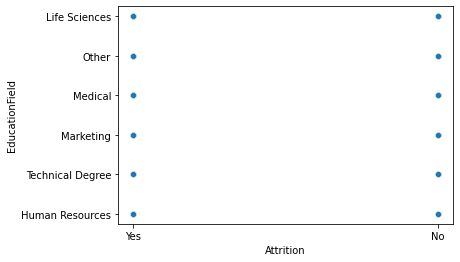

In [49]:
sn.scatterplot(x='Attrition',y='EducationField',data=df)

Employees under Human resources and other education field tend to attrit more than employees belonging to any other educational field.

<AxesSubplot:xlabel='Attrition', ylabel='Gender'>

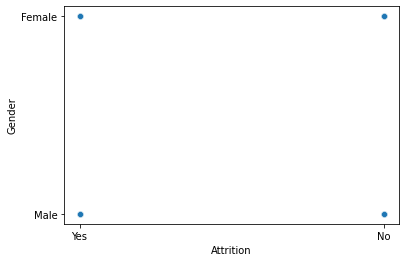

In [50]:
sn.scatterplot(x='Attrition',y='Gender',data=df)

There is no dependency on gender for attrition.

<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

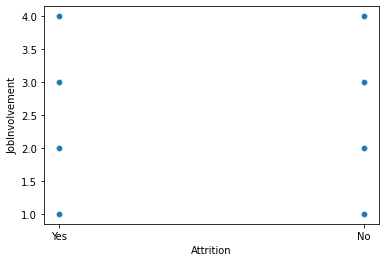

In [51]:
sn.scatterplot(x='Attrition',y='JobInvolvement',data=df)

Employees who are involved too much in work or too less tend to attrit more than employees who lie between these ranges.

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

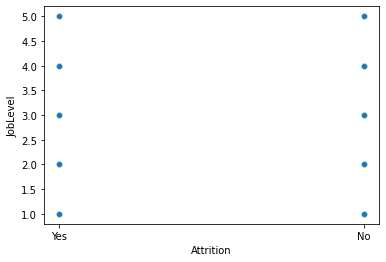

In [52]:
sn.scatterplot(x='Attrition',y='JobLevel',data=df)

Employees at higher job levels tend to attrit more than who are at lower level.

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

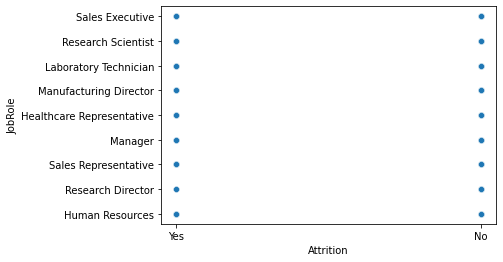

In [53]:
sn.scatterplot(x='Attrition',y='JobRole',data=df)

Research Directors show the most attrition followed by Managers and Human resources. While the Sales Executives show no attrition.

<AxesSubplot:xlabel='Attrition', ylabel='MaritalStatus'>

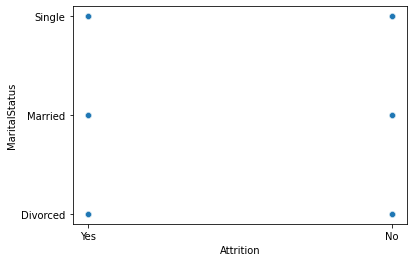

In [54]:
sn.scatterplot(x='Attrition',y='MaritalStatus',data=df)

Divorced employees show more attrition than single or Married ones.

<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

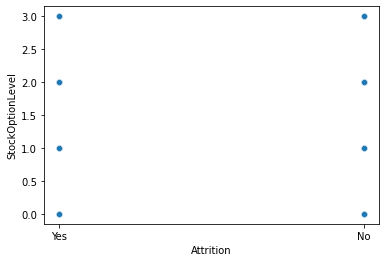

In [55]:
sn.scatterplot(x='Attrition',y='StockOptionLevel',data=df)

Employees in higher levels of stock option show more attrition than eployees in the lower levels.

<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

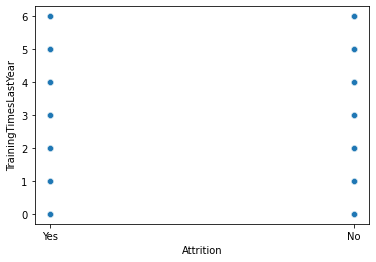

In [56]:
sn.scatterplot(x='Attrition',y='TrainingTimesLastYear',data=df)

Employees who train extensively or very less both tend to attrit. While employees training 2 to 3 times a year show no attrition.

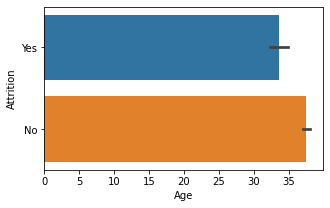

In [57]:
# Age
plt.figure(figsize=(5,3))
sn.barplot(x=df['Age'],y=df['Attrition'])
plt.show()

Attrition is maximum in the range 27 to 33. As age increases attrition decreases as people look for stability in their job.

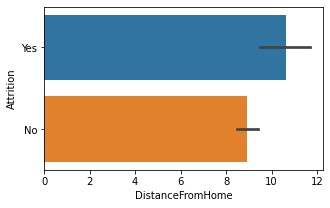

In [58]:
# DistanceFromHome
plt.figure(figsize=(5,3))
sn.barplot(x=df['DistanceFromHome'],y=df['Attrition'])
plt.show()

As the distance increases attrition decreases in employees showing that employees attrit even if they are at ease.

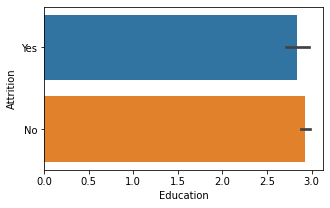

In [59]:
# Education
plt.figure(figsize=(5,3))
sn.barplot(x=df['Education'],y=df['Attrition'])
plt.show()

Whose is less educated tends to leave company sooner than others

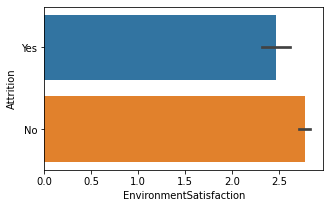

In [60]:
# EnvironmentSatisfaction
plt.figure(figsize=(5,3))
sn.barplot(x=df['EnvironmentSatisfaction'],y=df['Attrition'])
plt.show()

Who leastly likes the environment in company tends to leave company sooner than others

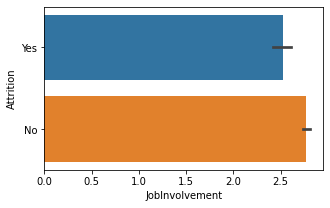

In [61]:
# JobInvolvement
plt.figure(figsize=(5,3))
sn.barplot(x=df['JobInvolvement'],y=df['Attrition'])
plt.show()

Who leastly involves in Job in company tends to leave company sooner than others

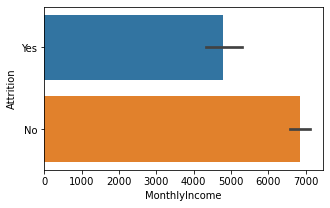

In [62]:
# Gender
plt.figure(figsize=(5,3))
sn.barplot(x=df['MonthlyIncome'],y=df['Attrition'])
plt.show()

Attrition is very high at low monthly income especially below 5000. As income inreases chances of employee leaving becomes very low.

# Multivariate Analysis

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

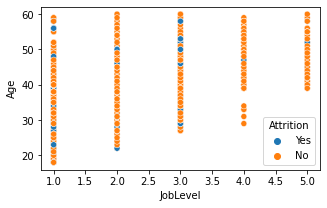

In [63]:
plt.figure(figsize=(5,3))
sn.scatterplot(x='JobLevel',y='Age',hue='Attrition',data=df)

As the age increases so does the job level and attrition decreases. Maximum attrition is seen in job level 1 and 3 irrespective of age of the employee

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

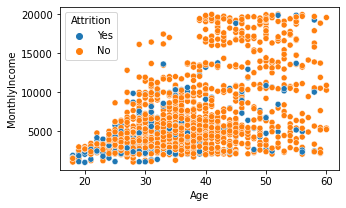

In [64]:
plt.figure(figsize=(5,3))
sn.scatterplot(x='Age',y='MonthlyIncome',hue='Attrition',data=df)

As age increases,monthly income increases and employees have low chances of leaving the company but if monthly income is lower at higher ages then chances of employee leaving the company increases

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

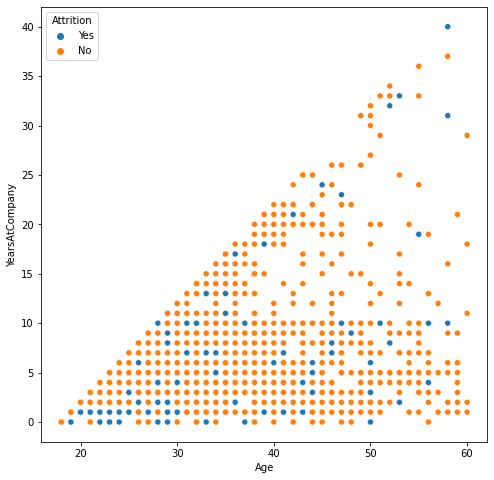

In [65]:
plt.figure(figsize=(8,8))
sn.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=df)

As we can see as the age and years at company increases density of grapgh decreases stating that as age increases very few people remain at the same company. Also high attrition is also seen at higher ages if years at company is less.

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

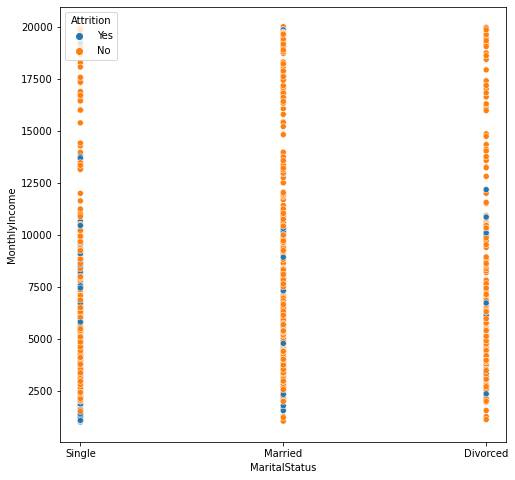

In [66]:
plt.figure(figsize=(8,8))
sn.scatterplot(x='MaritalStatus',y='MonthlyIncome',hue='Attrition',data=df)

Single employees at higher income also tend to attrit while married employees do not do so. This is also with the case of Divorced employees after income of 12500 there is no attrition.

# Checking for Coorelation

<AxesSubplot:>

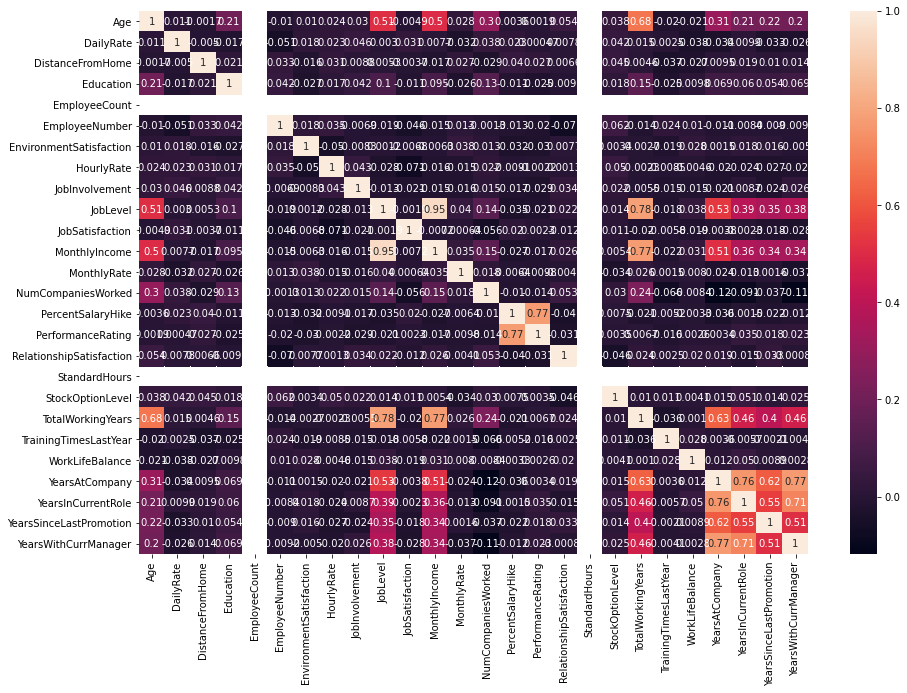

In [67]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(),annot=True)

We cannot see correlation of attrition column as it is of object type, we need to encode it first to see its correlation with defferent features.

# Converting All the columns to numeric using Label Encoder as all the columns content categorical data¶

In [69]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [70]:
df = df.apply(LabelEncoder().fit_transform)

# Removing Outliers

In [75]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df [(z<3).all(axis=1)]

In [76]:
new_df.shape

(0, 35)

In [73]:
df.shape

(1470, 35)

In [107]:
(83/1470)

0.05646258503401361

# Find the best Model

In [78]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [81]:
models = [  RandomForestClassifier(),AdaBoostClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = [ 'RandomForestClassifier', 'DecisionTreeClassifier','AdaBoostClassifier',
               'GradientBoostingClassifier']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}

In [82]:
models_df = pd.DataFrame(models)

In [83]:
models_df

,Modelling Algorithm,Accuracy
0,RandomForestClassifier,0.880952
1,DecisionTreeClassifier,0.867347
2,AdaBoostClassifier,0.765306
3,GradientBoostingClassifier,0.887755


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [87]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
pred = RFC.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [89]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
pred = DTC.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       255
           1       0.19      0.23      0.21        39

    accuracy                           0.77       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.79      0.77      0.78       294



In [90]:
from sklearn.svm import SVC
SV = SVC()
SV.fit(X_train, y_train)
pred = SV.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



In [91]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
pred = ABC.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       255
           1       0.50      0.31      0.38        39

    accuracy                           0.87       294
   macro avg       0.70      0.63      0.65       294
weighted avg       0.85      0.87      0.85       294



In [92]:
GBC =GradientBoostingClassifier()
GBC.fit(X_train, y_train)
pred = GBC.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)   

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.33      0.44        39

    accuracy                           0.89       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.87      0.89      0.87       294



In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
print(cross_val_score(DTC,X,y,cv=5).mean())

0.7816326530612245


In [95]:
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8571428571428571


In [96]:
print(cross_val_score(SV,X,y,cv=5).mean())

0.8387755102040817


In [97]:
print(cross_val_score(ABC,X,y,cv=5).mean())

0.8571428571428571


In [98]:
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8619047619047618


# Hyper parameter tuning

In [99]:
parameter = {'max_depth': np.arange(2, 50),
              'criterion':['gini','entropy'],
              'max_features':["auto", "sqrt", "log2"]}

In [100]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [101]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [102]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2'}

In [103]:
Final_mod = DecisionTreeClassifier(criterion= 'entropy', max_depth= 44,max_features='log2')
Final_mod.fit(X_train, y_train)
pred = Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

74.82993197278913


In [108]:
#AdaBoostClassifier
param_dict = {'n_estimators': list(range(1, 201, 20))}

adaboost_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(
    criterion='gini', max_depth=1000),  algorithm='SAMME.R'),
    param_grid=param_dict)

adaboost_clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1000)),
             param_grid={'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [109]:
adaboost_clf.best_params_

{'n_estimators': 181}

In [110]:
adaboost_clf.best_score_

0.8001767039307609

In [114]:
Final_mod = AdaBoostClassifier(n_estimators =181)
Final_mod.fit(X_train, y_train)
pred = Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

86.73469387755102


AdaBoostClassifier is the best Model with the accuracy 86.73

# Saving the Model

In [ ]:
import joblib
joblib.dump(pred,"prediction.pkl")